In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

In [ ]:
# Dataset

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

X = X.iloc[:130]
y = y.iloc[:130]

X=(X-X.mean())/X.std()

y = y - 1

In [ ]:
y = y['class']

In [ ]:
new_column_names = list(range(X.shape[1]))
X.rename(columns=dict(zip(X.columns, new_column_names)), inplace=True)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.446858,-0.293280,0.301312,-0.936752,1.761871,0.508454,0.772603,-0.460466,0.996374,0.888945,-0.111994,2.032163,0.779851
1,0.287952,-0.213731,-0.674587,-2.230695,0.006501,0.233424,0.365970,-0.643806,-0.875481,0.113933,-0.052714,0.937809,0.737300
2,0.242946,0.445383,1.108952,-0.054518,0.071515,0.508454,1.016583,-0.277126,1.960101,0.913548,-0.171275,0.453768,1.120264
3,1.604379,-0.020543,0.536874,-0.583858,0.851679,2.433670,1.355445,-0.827146,0.792509,2.217536,-1.179042,1.043036,1.957113
4,0.332958,0.706756,1.781986,0.651270,1.176748,0.508454,0.271089,0.547905,0.125313,0.077028,-0.111994,-0.051318,-0.156284


In [ ]:
def logistic_loss(X, y, weight):
    z = np.dot(X, weight)
    p = 1 / (1 + np.exp(-z))
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

In [ ]:
def compute_loss(X, y, weight, idx, alpha, beta, l):

    w_0 = weight[idx]
    w_p = w_0 + alpha
    w_m = w_0 - alpha

    weight[idx] = w_p
    lp = logistic_loss(X, y, weight)
    weight[idx] = w_m
    lm = logistic_loss(X, y, weight)

    weight[idx] = w_0

    if lp < l:
        return alpha, lp
    elif lm < l:
        return -1*alpha, lm
    elif lp > l and lm > l:
        return compute_loss(X, y, weight, idx, alpha/beta, beta, l)         # prevent infinite condition, use convergence logic

In [ ]:
def select_weight(X, y, w, alpha, beta, random_select=False):

    weight = []
    for i in range(len(w)):
        weight.append(w[i])
    l_all = logistic_loss(X, y, weight)

    if random_select:
        idx = random.randint(0, len(weight)-1)
        delta, loss = compute_loss(X, y, weight, idx, alpha, beta, l_all)
        dynamic_alpha = alpha
    else:
        idx = 0
        loss = float('inf')
        delta = alpha
        dynamic_alpha = 0
        for i in range(len(w)):
            d, l = compute_loss(X, y, weight, i, alpha, beta, l_all)
            if l < loss:
                loss = l
                idx = i
                delta = d
            if abs(d) > dynamic_alpha:
                dynamic_alpha = abs(d)
    return idx, delta, dynamic_alpha, loss

In [ ]:
def co_ord_desc(X, y, iterations, alpha, beta, random_select=False):

    w = {key: 0 for key in range(X.shape[1])}
    l = []

    for i in range(iterations):
        idx, delta, alpha, loss = select_weight(X, y, w, alpha, beta, random_select)
        w[idx] = w[idx] + delta
        l.append(loss)
        print(f'Iteration {i + 1}, Loss: {loss}')
    return w, l

In [ ]:
num_iterations = 30
#Co-ordinate Descent
w, l = co_ord_desc(X, y, num_iterations, 100, 2, random_select=False)

<ipython-input-6-99482759812a>:4: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))


Iteration 1, Loss: 0.3725545343070507
Iteration 2, Loss: 0.234055039195607
Iteration 3, Loss: 0.1186796903271277
Iteration 4, Loss: 0.05036279876826197
Iteration 5, Loss: 0.03144177006424073
Iteration 6, Loss: 0.017421187435882765
Iteration 7, Loss: 0.00768123832230942
Iteration 8, Loss: 0.007071396600111521
Iteration 9, Loss: 0.004654130783651708
Iteration 10, Loss: 0.0035553747847465724
Iteration 11, Loss: 0.002794695482653018
Iteration 12, Loss: 0.002657886198177901
Iteration 13, Loss: 0.00248217539473369
Iteration 14, Loss: 0.0019161135710568052
Iteration 15, Loss: 0.0015187107310748306
Iteration 16, Loss: 0.0011316053308352615
Iteration 17, Loss: 0.0009539245968643506
Iteration 18, Loss: 0.0008733826005007893
Iteration 19, Loss: 0.0007466007786061983
Iteration 20, Loss: 0.0006741749425126136
Iteration 21, Loss: 0.0006342867091893449
Iteration 22, Loss: 0.0005786016118828252
Iteration 23, Loss: 0.0005445569637563235
Iteration 24, Loss: 0.00047103946191069776
Iteration 25, Loss: 0.0

In [ ]:
#Radom-feature Co-ordinate Descent
w_random, l_random = co_ord_desc(X, y, num_iterations, 100, 2, random_select=True)

<ipython-input-6-99482759812a>:4: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))


Iteration 1, Loss: 0.6179964578609456
Iteration 2, Loss: 0.6168742580075033
Iteration 3, Loss: 0.6076504849967685
Iteration 4, Loss: 0.5831789373176013
Iteration 5, Loss: 0.5610655433611074
Iteration 6, Loss: 0.386113343759245
Iteration 7, Loss: 0.38179757514661744
Iteration 8, Loss: 0.3092557777787369
Iteration 9, Loss: 0.3057454406783482
Iteration 10, Loss: 0.2927361743784066
Iteration 11, Loss: 0.12338667328137755
Iteration 12, Loss: 0.11546964647288453
Iteration 13, Loss: 0.1087109907648139
Iteration 14, Loss: 0.10861313960285417
Iteration 15, Loss: 0.10667179914834726
Iteration 16, Loss: 0.10543540192067027
Iteration 17, Loss: 0.10493297644352496
Iteration 18, Loss: 0.0754230711777528
Iteration 19, Loss: 0.07125257879569706
Iteration 20, Loss: 0.04953361279541999
Iteration 21, Loss: 0.04911093664290412
Iteration 22, Loss: 0.04875424441852015
Iteration 23, Loss: 0.030914556705045417
Iteration 24, Loss: 0.0004998543744870681
Iteration 25, Loss: 0.0004236830055198655
Iteration 26, Lo

In [ ]:
# Grad Descent

# Initialize weights
weights = np.zeros(X.shape[1])

# Set learning rate and number of iterations
learning_rate = 300

# Log loss values
loss_values = []

# Logistic Regression with gradient descent
for i in range(num_iterations):
    # Calculate predicted probabilities
    y_prob = 1 / (1 + np.exp(-np.dot(X, weights)))

    # Calculate the logistic loss
    loss = -np.mean(y * np.log(y_prob) + (1 - y) * np.log(1 - y_prob))
    loss_values.append(loss)

    # Update weights using gradient descent
    gradient = np.dot(X.T, (y_prob - y)) / len(y)
    weights -= learning_rate * gradient

# Print loss values per iteration
for iteration, loss in enumerate(loss_values):
    print(f'Iteration {iteration + 1}, Loss: {loss}')

Iteration 1, Loss: 0.6931471805599453
Iteration 2, Loss: 19.979224472803768
Iteration 3, Loss: 10.254791363672986
Iteration 4, Loss: 2.834230584234729
Iteration 5, Loss: 1.9065879674310375
Iteration 6, Loss: 0.11730549331383361
Iteration 7, Loss: 1.0930856757792574e-06
Iteration 8, Loss: 1.089504916271677e-06
Iteration 9, Loss: 1.085947558497838e-06
Iteration 10, Loss: 1.0824133736803004e-06
Iteration 11, Loss: 1.0789021359996604e-06
Iteration 12, Loss: 1.0754136225834426e-06
Iteration 13, Loss: 1.0719476134194936e-06
Iteration 14, Loss: 1.0685038913426516e-06
Iteration 15, Loss: 1.0650822419548035e-06
Iteration 16, Loss: 1.0616824536270995e-06
Iteration 17, Loss: 1.058304317400023e-06
Iteration 18, Loss: 1.0549476269856067e-06
Iteration 19, Loss: 1.0516121787008121e-06
Iteration 20, Loss: 1.0482977714564208e-06
Iteration 21, Loss: 1.0450042066615475e-06
Iteration 22, Loss: 1.0417312882458402e-06
Iteration 23, Loss: 1.0384788225706551e-06
Iteration 24, Loss: 1.0352466184312712e-06
Iter

<ipython-input-30-e8a65170e2fd>:15: RuntimeWarning: overflow encountered in exp
  y_prob = 1 / (1 + np.exp(-np.dot(X, weights)))
<ipython-input-30-e8a65170e2fd>:18: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_prob) + (1 - y) * np.log(1 - y_prob))


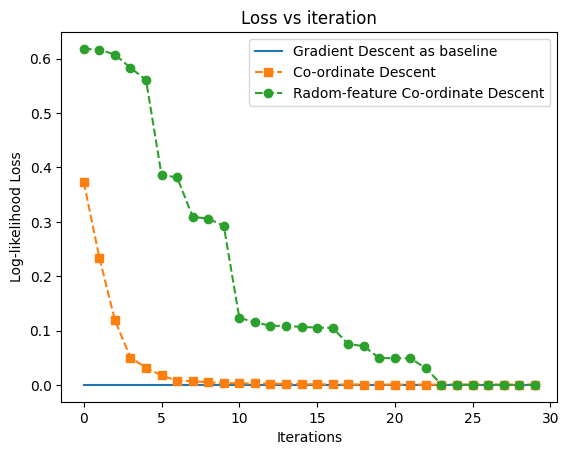

In [ ]:
# Sample data
x_values = [x for x in range(num_iterations)]
loss_values = [loss_values[-1] for i in range(num_iterations)]

# Plotting the first set of values
plt.plot(x_values, loss_values, label='Gradient Descent as baseline', linestyle='-')

# Plotting the second set of values
plt.plot(x_values, l, label='Co-ordinate Descent', marker='s', linestyle='--')

# Plotting the third set of values
plt.plot(x_values, l_random, label='Radom-feature Co-ordinate Descent', marker='o', linestyle='--')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Log-likelihood Loss')
plt.title('Loss vs iteration')

# Adding legend
plt.legend()

# Display the plot
plt.show()
